In [1]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 1. 일별 데이터로 시행

## 1-1 일단위 KOSPI 데이터 불러오기 (2021년 대상)

### 1-1 a) yfinance

In [2]:
import yfinance as yf

kospi = yf.download('^KS11', '2021-01-01', '2021-12-31')
kospi

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,2874.500000,2946.540039,2869.110107,2944.449951,2944.449951,1026500
2021-01-05,2943.669922,2990.570068,2921.840088,2990.570068,2990.570068,1519900
2021-01-06,2993.340088,3027.159912,2961.370117,2968.209961,2968.209961,1793400
2021-01-07,2980.750000,3055.280029,2980.750000,3031.679932,3031.679932,1524700
2021-01-08,3040.110107,3161.110107,3040.110107,3152.179932,3152.179932,1297900
...,...,...,...,...,...,...
2021-12-24,3009.479980,3025.770020,3009.479980,3012.429932,3012.429932,537500
2021-12-27,3013.939941,3017.310059,2999.300049,2999.550049,2999.550049,475000
2021-12-28,3006.770020,3020.290039,2991.550049,3020.239990,3020.239990,607000


### 1-1 b) pandas_datareader

In [3]:
import pandas_datareader as pdr

kospi = pdr.get_data_yahoo('^KS11', '2021-01-01', '2021-12-31')
kospi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,2946.540039,2869.110107,2874.500000,2944.449951,1026500,2944.449951
2021-01-05,2990.570068,2921.840088,2943.669922,2990.570068,1519900,2990.570068
2021-01-06,3027.159912,2961.370117,2993.340088,2968.209961,1793400,2968.209961
2021-01-07,3055.280029,2980.750000,2980.750000,3031.679932,1524700,3031.679932
2021-01-08,3161.110107,3040.110107,3040.110107,3152.179932,1297900,3152.179932
...,...,...,...,...,...,...
2021-12-24,3025.770020,3009.479980,3009.479980,3012.429932,537500,3012.429932
2021-12-27,3017.310059,2999.300049,3013.939941,2999.550049,475000,2999.550049
2021-12-28,3020.290039,2991.550049,3006.770020,3020.239990,607000,3020.239990


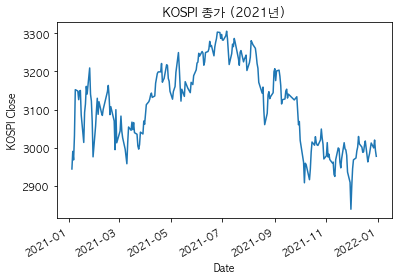

In [4]:
# 코스피 종가 그래프 도출

kospi['Close'].plot(kind='line')
plt.ylabel('KOSPI Close')
plt.title('KOSPI 종가 (2021년)')
plt.show()

### 1-1 c) 전처리 시행

In [5]:
# 월말 영업일 데이터만 추출하는 부분

# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출
kospi = kospi.reset_index()
start_date = kospi['Date'].astype(str).iloc[0]
end_date = kospi['Date'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all = pd.date_range(start_date, end_date, freq='B').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
date_all.head()

,Date
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08


### 1-1 c) 참고
pandas의 date_range 매서드 중 파라미터 freq의 값은 빈도를 의미합니다.

종류는 다음과 같습니다. (출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

![freq](https://1.bp.blogspot.com/-ZawqFA_zuA4/W9MNwAwVVRI/AAAAAAAAAsc/bXgVCLPnpzUhDKVtHqjWOcanxJAkzBrLgCLcBGAs/s1600/time%2Bseries%2Bfrequencies.png)

In [6]:
# 데이터 병합 (영업일 date와 kospi 병합)
kospi_all = pd.merge(date_all,kospi,how='left')
print(f'Nan값 개수 확인 : {kospi_all["Close"].isna().value_counts()[1]}')

kospi_all.head()

Nan값 개수 확인 : 11


,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,2946.540039,2869.110107,2874.500000,2944.449951,1026500.0,2944.449951
1,2021-01-05,2990.570068,2921.840088,2943.669922,2990.570068,1519900.0,2990.570068
2,2021-01-06,3027.159912,2961.370117,2993.340088,2968.209961,1793400.0,2968.209961
3,2021-01-07,3055.280029,2980.750000,2980.750000,3031.679932,1524700.0,3031.679932
4,2021-01-08,3161.110107,3040.110107,3040.110107,3152.179932,1297900.0,3152.179932


In [7]:
# 직전 값으로 NaN 값 채우기
kospi_all = kospi_all.fillna(method='ffill')

print('Nan값 개수 확인')
print(kospi_all["Close"].isna().value_counts())

kospi_all.head()

Nan값 개수 확인
False    259
Name: Close, dtype: int64


,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,2946.540039,2869.110107,2874.500000,2944.449951,1026500.0,2944.449951
1,2021-01-05,2990.570068,2921.840088,2943.669922,2990.570068,1519900.0,2990.570068
2,2021-01-06,3027.159912,2961.370117,2993.340088,2968.209961,1793400.0,2968.209961
3,2021-01-07,3055.280029,2980.750000,2980.750000,3031.679932,1524700.0,3031.679932
4,2021-01-08,3161.110107,3040.110107,3040.110107,3152.179932,1297900.0,3152.179932


In [8]:
# 마지막 영업일 제외후 나머지 drop
kospi_bd = kospi_all.set_index(kospi_all['Date'])
kospi_bd = kospi_bd.drop(columns={'Date'})
kospi_bd

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,2946.540039,2869.110107,2874.500000,2944.449951,1026500.0,2944.449951
2021-01-05,2990.570068,2921.840088,2943.669922,2990.570068,1519900.0,2990.570068
2021-01-06,3027.159912,2961.370117,2993.340088,2968.209961,1793400.0,2968.209961
2021-01-07,3055.280029,2980.750000,2980.750000,3031.679932,1524700.0,3031.679932
2021-01-08,3161.110107,3040.110107,3040.110107,3152.179932,1297900.0,3152.179932
...,...,...,...,...,...,...
2021-12-24,3025.770020,3009.479980,3009.479980,3012.429932,537500.0,3012.429932
2021-12-27,3017.310059,2999.300049,3013.939941,2999.550049,475000.0,2999.550049
2021-12-28,3020.290039,2991.550049,3006.770020,3020.239990,607000.0,3020.239990


## 1-2 전일대비 수익률 구하기

### 1-2 a) 차분 시행 후 나누기

In [9]:
# diff를 통해 차분시행 후, 데이터 Nan 값 제거

kospi_diff = kospi_bd.diff(1)['Close'].dropna()
kospi_diff = pd.DataFrame(kospi_diff)
print('diff 후 \n', kospi_diff.head())

print('-'*10)
# shift를 통해 1/4일 데이터를 1/5일로 미룸

kospi_shift = kospi_bd['Close'].shift(1).dropna()
kospi_shift = pd.DataFrame(kospi_shift)
print('shift 후 \n', kospi_shift.head())

diff 후 
                  Close
Date                  
2021-01-05   46.120117
2021-01-06  -22.360107
2021-01-07   63.469971
2021-01-08  120.500000
2021-01-11   -3.729980
----------
shift 후 
                   Close
Date                   
2021-01-05  2944.449951
2021-01-06  2990.570068
2021-01-07  2968.209961
2021-01-08  3031.679932
2021-01-11  3152.179932


In [35]:
# 전일대비 수익률 도출 (%로 표현하기 위해 100을 곱해준다)

kospi_return = (kospi_diff / kospi_shift) * 100
kospi_return.head()

,Close
Date,
2021-01-05,1.566341
2021-01-06,-0.747687
2021-01-07,2.138325
2021-01-08,3.974694
2021-01-11,-0.118330


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


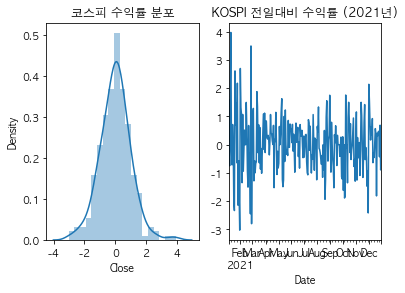

In [36]:
# 코스피 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(kospi_return['Close'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,2)
kospi_return['Close'].plot(kind='line')
plt.title('KOSPI 전일대비 수익률 (2021년)')
plt.show()

### 1-2 b) pct_change 사용하여 한번에 구하는 법

In [37]:
# 전일대비 수익률 도출 (pct_change 사용, %로 표현하기 위해 100을 곱해준다) : 위와 동일한 결과 출력

kospi_return2 = kospi_bd['Close'].pct_change().dropna()
kospi_return2 = pd.DataFrame(kospi_return2) * 100
kospi_return2.head()

,Close
Date,
2021-01-05,1.566341
2021-01-06,-0.747687
2021-01-07,2.138325
2021-01-08,3.974694
2021-01-11,-0.118330


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


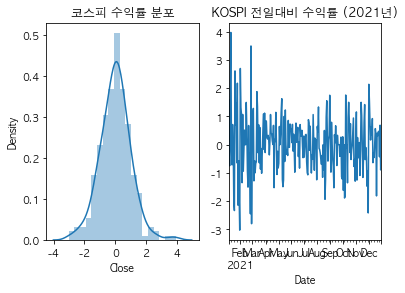

In [38]:
# 코스피 전일대비 수익률 그래프 도출
plt.subplot(1,2,1)
sns.distplot(kospi_return2['Close'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,2)
kospi_return2['Close'].plot(kind='line')
plt.title('KOSPI 전일대비 수익률 (2021년)')
plt.show()

## 1-3 정규성 검정

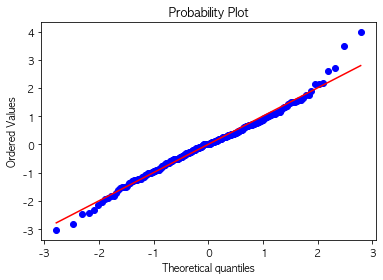

In [39]:
# 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(kospi_return['Close'],plot=plt) 
plt.show()

In [40]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(kospi_return)

if pval < .05:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(kospi_return)

if pval < .05:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  1.181% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.005% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


## 1-4 기초통계량 구하기

### 1-4 a) simple example

In [41]:
kospi_return.describe()

,Close
count,258.000000
mean,0.009336
std,1.001477
min,-3.025043
25%,-0.577211
50%,0.000000
75%,0.619726
max,3.974694


In [42]:
print('KOSPI 수익률의 평균 : ',kospi_return.mean().values)
print('KOSPI 수익률의 중위값 : ',kospi_return.median().values)
print('KOSPI 수익률의 분산 : ', kospi_return.var().values)

KOSPI 수익률의 평균 :  [0.00933557]
KOSPI 수익률의 중위값 :  [0.]
KOSPI 수익률의 분산 :  [1.00295675]


### 1-4 b) Stock return by log

- 만약 년간 기대수익률을 추정하고 싶다면 위에 계산된 일별 로그수익률 mu에 단순히 1년간 거래일(여기서는 259일을 사용합니다)을 곱해주면 됩니다. 
- 하지만, 영업일을 사용하는 경우에는 iid 가정이 필요합니다. (independent and identically distribution)
  - 이는 일별 기대수익률 간에 독립적이고 같은 확률 분포를 가지고 있다는 가정입니다.
  - 실제적으로는 이런 iid 가정이 성립하기 어렵습니다.

In [18]:
# 일별 기대수익률
kospi_log = np.log(kospi_bd['Close'] / kospi_bd['Close'].shift(1)) 
kospi_log = pd.DataFrame(kospi_log.dropna())
kospi_log

# 단순 로그 수익률 평균
mu = kospi_log.mean().values

# 영업일을 곱하여 1년 평균 수익률 산출 (259일이므로 mu * 259일)
print(f'KOSPI 1년 평균로그수익률 : {mu * 259 * 100}%') 


KOSPI 1년 평균로그수익률 : [1.12557988]%


In [19]:
# 일별 수익률의 표준편차 (수익률 위험 지표)
print(f'KOSPI 일단위 수익률 위험(표준편차) : {kospi_log.std().values}')

# 연단위 수익률의 표준편차
print(f'KOSPI 1년 수익률 위험(표준편차) : {(kospi_log.std() * np.sqrt(259)).values}')

KOSPI 일단위 수익률 위험(표준편차) : [0.01000632]
KOSPI 1년 수익률 위험(표준편차) : [0.16103646]


# 2. 월별 데이터로 시행

## 2-1 일단위 KOSPI 데이터 불러오기 (2019년 ~ 2021년 대상)

### 2-1 a) yfinance 사용

In [20]:
import yfinance as yf

# yfinance 데이터 불러오기
kospi_3y = yf.download('^KS11', '2019-01-01', '2022-01-01', period='1d')
kospi_3y

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,2010.000000,326400
2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,1993.699951,428000
2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,2010.250000,409000
2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,2037.099976,440200
2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,2025.270020,397800
...,...,...,...,...,...,...
2021-12-24,3009.479980,3025.770020,3009.479980,3012.429932,3012.429932,537500
2021-12-27,3013.939941,3017.310059,2999.300049,2999.550049,2999.550049,475000
2021-12-28,3006.770020,3020.290039,2991.550049,3020.239990,3020.239990,607000


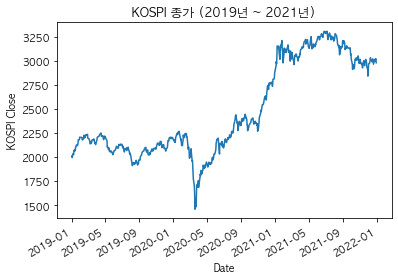

In [21]:
# 코스피 종가 그래프 도출

kospi_3y['Close'].plot(kind='line')
plt.ylabel('KOSPI Close')
plt.title('KOSPI 종가 (2019년 ~ 2021년)')
plt.show()

### 2-1 b) 전처리 시행

In [22]:
# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출
kospi_3y = kospi_3y.reset_index()
start_date2 = kospi_3y['Date'].astype(str).iloc[0]
end_date2 = kospi_3y['Date'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all2 = pd.date_range(start_date2, end_date2, freq='B').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
date_all2.head()

,Date
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08


In [23]:
# 데이터 병합 (영업일 date와 kospi 병합)
kospi_all2 = pd.merge(date_all2, kospi_3y, how='left')
print(f'Nan값 개수 확인 : {kospi_all2["Close"].isna().value_counts()[1]}')

kospi_all2.head()

Nan값 개수 확인 : 40


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,2010.000000,326400.0
1,2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,1993.699951,428000.0
2,2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,2010.250000,409000.0
3,2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,2037.099976,440200.0
4,2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,2025.270020,397800.0


In [24]:
# 직전 값으로 NaN 값 채우기
kospi_all2 = kospi_all2.fillna(method='ffill')

print('Nan값 개수 확인')
print(kospi_all2["Close"].isna().value_counts())

kospi_all2.head()

Nan값 개수 확인
False    782
Name: Close, dtype: int64


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,2010.000000,326400.0
1,2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,1993.699951,428000.0
2,2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,2010.250000,409000.0
3,2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,2037.099976,440200.0
4,2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,2025.270020,397800.0


In [25]:
# 각 월당 마지막 영업일 도출
month_end = pd.date_range('2019-01-01', '2022-01-01', freq='BM')

# 마지막 영업일 제외후 나머지 drop
kospi_bm = kospi_all2[kospi_all2['Date'].isin(month_end)].reset_index(drop=True)
kospi_bm = kospi_bm.set_index(kospi_bm['Date'])
kospi_bm = kospi_bm.drop(columns='Date')
kospi_bm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,2222.879883,2222.879883,2201.219971,2204.850098,2204.850098,545200.0
2019-02-28,2231.580078,2233.929932,2195.439941,2195.439941,2195.439941,510000.0
2019-03-29,2138.449951,2143.300049,2124.070068,2140.669922,2140.669922,364600.0
2019-04-30,2213.429932,2215.770020,2186.330078,2203.590088,2203.590088,381400.0
2019-05-31,2029.030029,2048.899902,2022.969971,2041.739990,2041.739990,439200.0
2019-06-28,2135.060059,2139.239990,2123.969971,2130.620117,2130.620117,537300.0
2019-07-31,2036.459961,2041.160034,2010.949951,2024.550049,2024.550049,589400.0
2019-08-30,1951.660034,1971.209961,1951.300049,1967.790039,1967.790039,317700.0
2019-09-30,2045.770020,2064.989990,2042.010010,2063.050049,2063.050049,327600.0


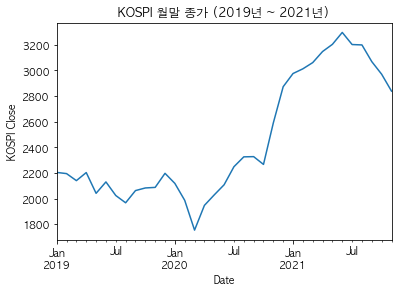

In [26]:
# 코스피 종가 그래프 도출

kospi_bm['Close'].plot(kind='line')
plt.ylabel('KOSPI Close')
plt.title('KOSPI 월말 종가 (2019년 ~ 2021년)')
plt.show()

## 2-2 전월대비 수익률 구하기

### pct_change 사용하여 한번에 구하는 법

In [43]:
# 전월대비 수익률 도출 (pct_change 사용, %로 표현하기 위해 100을 곱해준다)

kospi_bm_return = kospi_bm['Close'].pct_change().dropna()
kospi_bm_return = pd.DataFrame(kospi_bm_return) * 100
kospi_bm_return.head()

,Close
Date,
2019-02-28,-0.426793
2019-03-29,-2.494717
2019-04-30,2.939275
2019-05-31,-7.344837
2019-06-28,4.353156


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


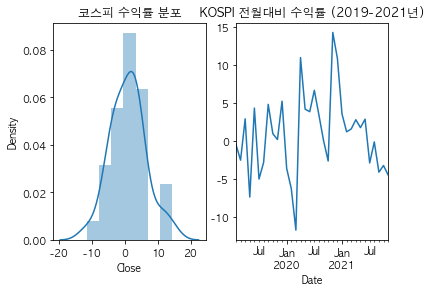

In [44]:
# 코스피 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(kospi_bm_return['Close'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,2)
kospi_bm_return['Close'].plot(kind='line')
plt.title('KOSPI 전월대비 수익률 (2019-2021년)')
plt.show()

## 2-3 정규성 검정

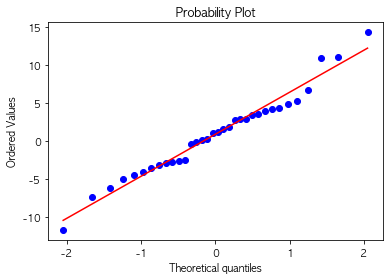

In [45]:
# 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(kospi_bm_return['Close'],plot=plt) 
plt.show()

In [46]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(kospi_bm_return)

if pval < .05:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')


# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(kospi_bm_return)

if pval < .05:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  73.723% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  78.976% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


## 2-4 기초통계량 구하기

### 2-4 a) simple example

In [47]:
kospi_bm_return.describe()

,Close
count,34.000000
mean,0.886373
std,5.408617
min,-11.694455
25%,-2.847599
50%,1.112367
75%,3.803188
max,14.299460


In [48]:
print('KOSPI 수익률의 평균 : ',kospi_bm_return.mean().values)
print('KOSPI 수익률의 중위값 : ',kospi_bm_return.median().values)
print('KOSPI 수익률의 분산 : ', kospi_bm_return.var().values)

KOSPI 수익률의 평균 :  [0.88637251]
KOSPI 수익률의 중위값 :  [1.11236682]
KOSPI 수익률의 분산 :  [29.25313467]


### 2-4 b) Stock yield by log

In [49]:
# 월별 기대수익률
kospi_bm_return_log = np.log(kospi_bm_return['Close'] / kospi_bm_return['Close'].shift(1)) 
kospi_bm_return_log = pd.DataFrame(kospi_bm_return_log.dropna())
kospi_bm_return_log

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close
Date,
2019-03-29,1.765630
2019-08-30,-0.574202
2019-10-31,-1.586883
2019-11-29,-1.527236
2019-12-31,3.196074
2020-02-28,0.554117
2020-03-31,0.629847
2020-05-29,-0.959384
2020-06-30,-0.082442


In [50]:
# 단순 로그 수익률 평균
mu = kospi_bm_return_log.mean().values

# 영업일을 곱하여 평균 수익률 산출 (35개월이므로 mu * 35개월)
# 물론 위에서 언급했듯, 월간 수익률 데이터간에는 iid 가정이 필요합니다.
print(f'KOSPI 35개월 평균로그수익률 : {mu * 35 * 100}%') 

# 일별 수익률의 표준편차 (수익률 위험 지표)
print(f'KOSPI 월단위 수익률 위험(표준편차) : {kospi_bm_return_log.std().values}')

# 연단위 수익률의 표준편차
print(f'KOSPI 35개월 수익률 위험(표준편차) : {(kospi_bm_return_log.std() * np.sqrt(35)).values}')

KOSPI 35개월 평균로그수익률 : [-563.71928359]%
KOSPI 월단위 수익률 위험(표준편차) : [1.7072488]
KOSPI 35개월 수익률 위험(표준편차) : [10.10022011]
